## CO2 Emissions - Linear Regression

En este proyecto, abordamos un problema de regresión utilizando un conjunto de datos de vehículos que contiene información técnica y de consumo de combustible de diferentes modelos. El objetivo principal es predecir las **emisiones de $CO₂$** (en **g/km**) a partir de diversas características del vehículo.

Vamos a utilizar el archivo `fuel_consumption_co2.csv`.

#### Descripción del DataFrame

| Columna                                   | Descripción                                                                                                               |
|-------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **Model year**                            | Año del modelo del vehículo.                                                                                              |
| **Make**                                  | Marca del fabricante.                                                                                                     |
| **Model**                                 | Modelo del vehículo.                                                                                                      |
| **Vehicle class**                         | Clasificación del vehículo basada en el volumen interior para coches y en el peso bruto vehicular para camionetas ligeras.|
| **Engine size (L)**                       | Tamaño del motor (en litros).                                                                                             |
| **Cylinders**                             | Número de cilindros del motor.                                                                                            |
| **Transmission**                          | Tipo de transmisión y número de marchas/velocidades.                                                                      |
| **Fuel type**                             | Tipo de combustible utilizado.                                                                                            |
| **Fuel Consumption City (L/100 km)**      | Consumo de combustible en ciudad (litros por 100 km).                                                                     |
| **Fuel Consumption Highway (L/100 km)**   | Consumo en carretera (litros por 100 km).                                                                                 |
| **Fuel Consumption Combined (L/100 km)**  | Consumo combinado (55% city + 45% highway), en litros por 100 km.                                                             |
| **Fuel Consumption Combined (mpg)**       | Consumo combinado en millas por galón (miles per galon).                                                          |
| **CO2 emissions (g/km)**                  | Emisiones de dióxido de carbono por kilómetro recorrido (**target**).                                                     |

#### Tipos de Transmisiones

| Código     | Descripción                 |
|------------|-----------------------------|
| **A**      | Automatic.                  |
| **AM**     | Automated manual.           |
| **AS**     | Automatic with select shift.|
| **AV**     | Continuously variable.      |


### 01. Exploratory Data Analysis
1. Histograma de **CO2 emissions (g/km)**
2. Histograma de **Fuel Consumption City (L/100 km)**
3. Boxplot de **Fuel Type** y **CO2 emissions (g/km)**
4. Gráficos de dispersión:
    
    4.1 **Engine size (L)** y **CO2 emissions (g/km)**.
   
    4.2 **Cylinders** y **CO2 emissions (g/km)**.
   
    4.3 **Fuel Consumption City (L/100 km)** y **CO2 emissions (g/km)**.
   
    4.4 **Fuel Consumption City (L/100 km)** y **CO2 emissions (g/km)** segmentado por **Fuel type**.
   
6. Gráfico de Barras mostrando la media de **CO2 emissions (g/km)** para cada año.

---
### 02. Procesamiento de Datos
- Tratamiento de **NaN's**.
- Tratamiento de **outliers**.
- Realiza transformaciones que consideres interesantes.
- Elimina columnas con información redundante o irrelevante.
- Codifica las variables categóricas que consideres.
---
### 03. Modelo de Regresión y Métricas
- Con los datos ya preparados, separalos en **Train** y **Test**, usa los parámetros _**test_size = 0.2**_ y _**random_state = 42**_.
- Escala los **X** e **y** usando _**MinMaxScaler()**_ para cada uno.
- Aplica el modelo de _**LinearRegression()**_ y calcula las métricas para el modelo, guarda estos resultados en forma de **DataFrame**.
---
### 04. Agrupación
- Viendo la gráfica **4.4**, vemos que algunos **Fuel type** se comportan de la misma forma cuando representamos ambas columnas, lo que nos indica que podemos agruparlos en una **"clase"** o **"categoría"** nueva.
- Añade al **DataFrame** original una columna con esta nueva categoría y divide los datos en tantos **DataFrames** como consideres necesarios.
- Repite el punto anterior para todos los **DataFrames** y compara los resultados con el modelo anterior.
- Recuerda eliminar la columna **Fuel type**, ya que su información la estamos representando en la nueva columna de agrupación.

In [1]:
# Análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de Datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer 

# Modelos
from sklearn.linear_model import LinearRegression

# Train Test Split
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importar herramientas de preprocesamiento que se necesiten...
# ...
from sklearn.preprocessing import TargetEncoder

In [2]:
df = pd.read_csv(filepath_or_buffer = "../Data/fuel_consumption_co2.csv")
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),CO2 emissions (g/km)
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,Reg. Gasoline,11.6,8.3,10.1,28.0,232
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,Reg. Gasoline,11.0,8.3,9.8,29.0,225
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Prm. Gasoline,10.8,8.3,9.7,29.0,223
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Prm. Gasoline,14.2,10.5,12.5,23.0,288
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Prm. Gasoline,NaN,NaN,NaN,NaN,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27774,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,NaN,AS8,Prm. Gasoline,10.0,7.5,8.9,32.0,207
27775,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,NaN,AS8,Prm. Gasoline,10.7,8.1,9.5,30.0,223
27776,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,NaN,AS8,Prm. Gasoline,9.9,7.8,9.0,31.0,210
27777,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,NaN,AS8,Prm. Gasoline,10.6,8.3,9.6,29.0,226


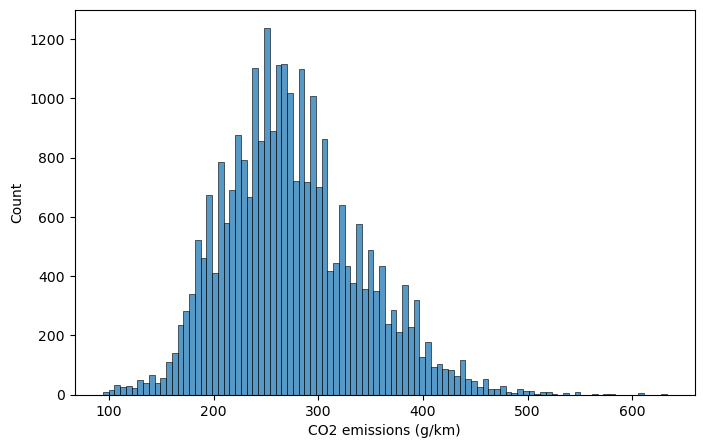

In [3]:
#01. Exploratory Data Analysis¶
#Histograma de CO2 emissions (g/km)
plt.figure(figsize=(8, 5))
sns.histplot(df['CO2 emissions (g/km)'])

plt.show()

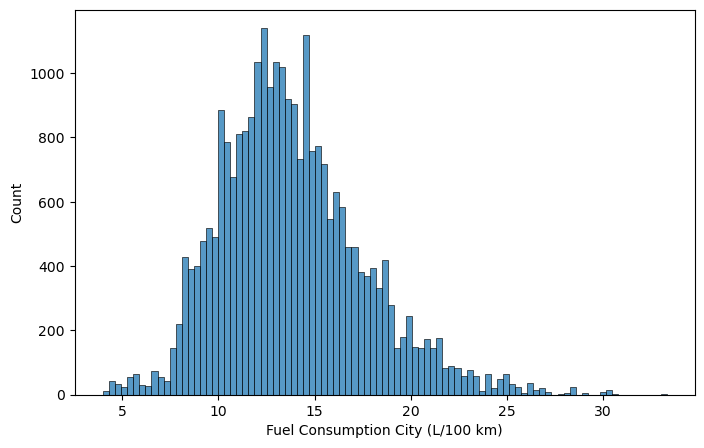

In [4]:
#Histograma de Fuel Consumption City (L/100 km)
plt.figure(figsize=(8, 5))
sns.histplot(df['Fuel Consumption City (L/100 km)'])

plt.show()

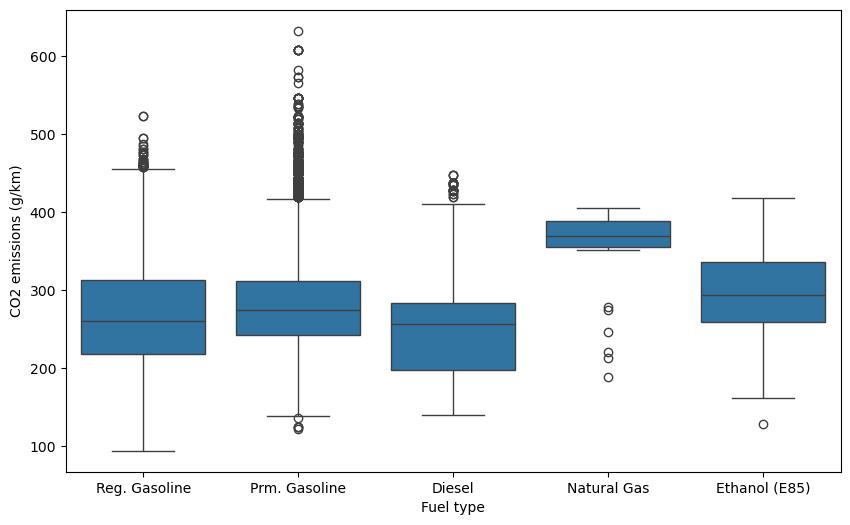

In [5]:
#Boxplot de Fuel Type y CO2 emissions (g/km)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)')

plt.show()

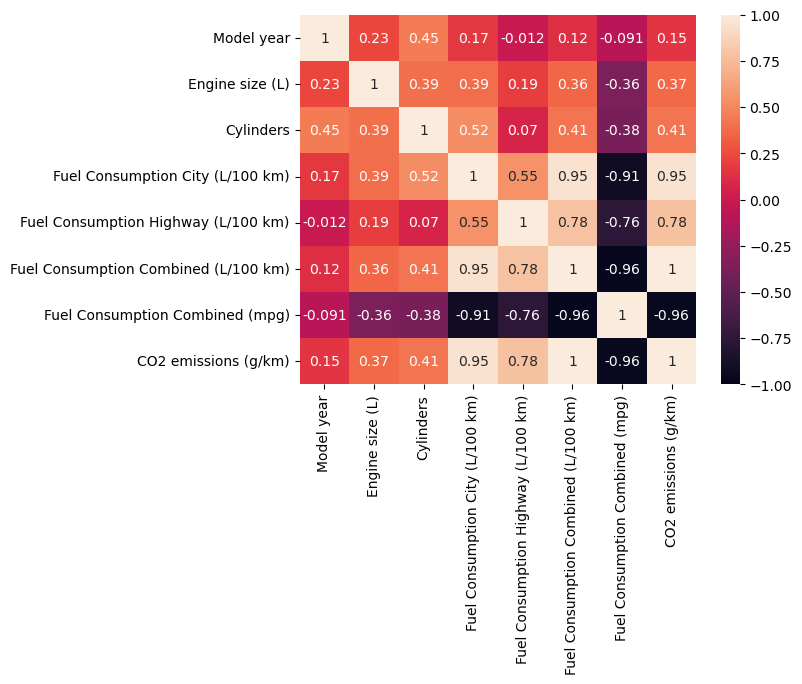

Cylinders
8.0     195
12.0    155
10.0     35
16.0     16
Name: count, dtype: int64

In [6]:
#Selecciona solo los vehículos cuyo combustible sea Prm. Gasoline.
#Selecciona solo los que tengan emisiones de CO₂ mayores o iguales a 415 g/km.
#ombina las dos condiciones para que ambas se cumplan a la vez.
#df1 contendrá únicamente los coches de gasolina prémium muy contaminantes (CO₂ ≥ 415).

df1 = df[(df["Fuel type"] == "Prm. Gasoline") & (df["CO2 emissions (g/km)"] >= 415)]

# sns.histplot(df1["CO2 emissions (g/km)"])
# plt.show()

sns.heatmap(df1._get_numeric_data().corr(), vmin = -1, annot = True)
plt.show()

#Cuenta cuántos vehículos de df1 tienen cada número de cilindros.
#El resultado te dice la distribución de cilindros solo para esos coches de gasolina prémium con emisiones muy altas.

df1["Cylinders"].value_counts() 

In [7]:
#Selecciona solo las filas donde el tipo de combustible sea Prm. Gasoline.
#Encuentra las filas donde las emisiones de CO₂ sean mayores o iguales a 415 g/km.
#El símbolo ~ es la negación booleana en pandas, así que esto selecciona las filas donde NO se cumple la condición anterior (es decir, emisiones menores a 415 g/km).

df2 = df[(df["Fuel type"] == "Prm. Gasoline") & ~(df["CO2 emissions (g/km)"] >= 415)]

#Esto cuenta cuántas veces aparece cada número de cilindros en el df2.

df2["Cylinders"].value_counts()

Cylinders
6.0     4155
8.0     2717
4.0     2611
12.0     367
10.0     145
3.0      103
2.0       17
5.0       15
Name: count, dtype: int64

C:\Users\csd\AppData\Local\Temp\ipykernel_18340\1185221510.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["outlier"] = df3["CO2 emissions (g/km)"].apply(lambda x : 1 if x >= 415 else 0)


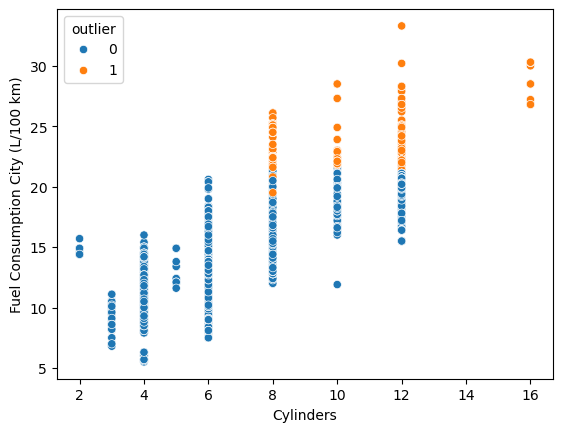

In [8]:
#Te quedas solo con los coches que usan gasolina prémium.

df3 = df[df["Fuel type"] == "Prm. Gasoline"]

#Para cada fila:
#Si las emisiones de CO₂ son ≥ 415 g/km, marca un 1 (lo consideras un outlier o dato extremo).
#Si son menores, marca un 0 (dato normal).
#Así clasificas visualmente cuáles son los casos extremos.
#Nota: Esto genera un SettingWithCopyWarning en pandas, porque estás añadiendo una columna directamente a un DataFrame filtrado. No rompe el código, pero es recomendable usar .copy() o .loc.

df3["outlier"] = df3["CO2 emissions (g/km)"].apply(lambda x : 1 if x >= 415 else 0)

sns.scatterplot(x = df3["Cylinders"], y = df3["Fuel Consumption City (L/100 km)"], hue = df3["outlier"])
plt.show()

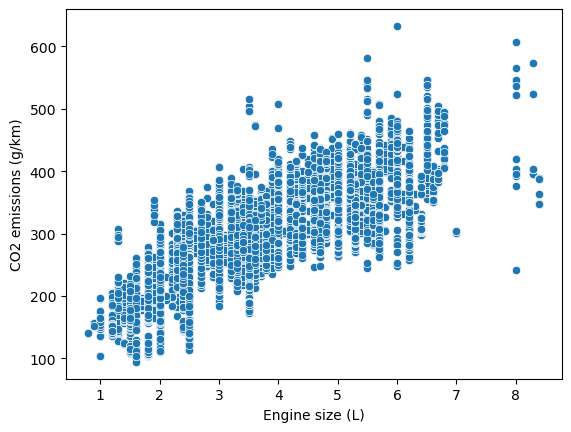

In [9]:
#Gráficos de dispersión:

#4.1 Engine size (L) y CO2 emissions (g/km).
sns.scatterplot(data=df, x="Engine size (L)", y="CO2 emissions (g/km)")

plt.show()

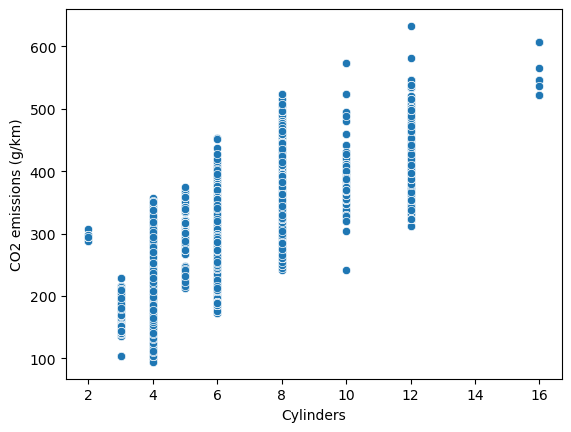

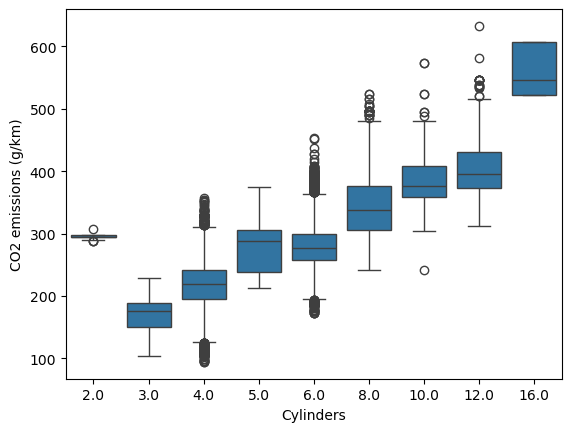

In [10]:
#4.2 Cylinders y CO2 emissions (g/km).
sns.scatterplot(data=df, x="Cylinders", y="CO2 emissions (g/km)")
plt.show()

sns.boxplot(x = df["Cylinders"], y = df["CO2 emissions (g/km)"])
plt.show()

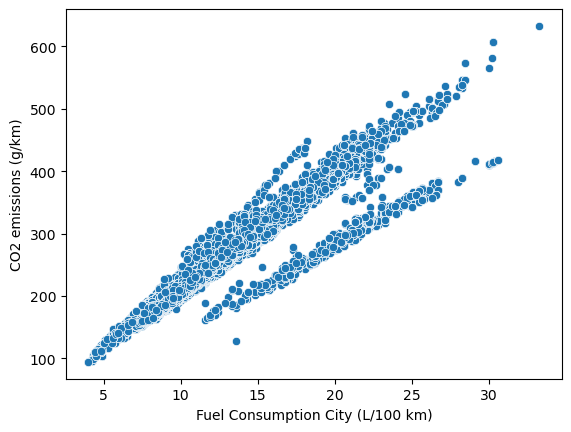

In [11]:
#4.3 Fuel Consumption City (L/100 km) y CO2 emissions (g/km).
sns.scatterplot(data=df, x="Fuel Consumption City (L/100 km)", y="CO2 emissions (g/km)")

plt.show()

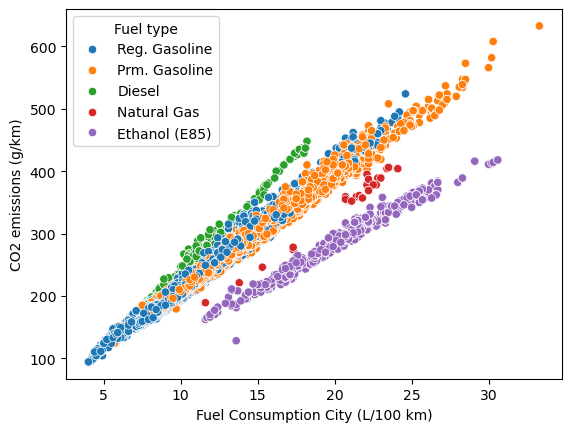

In [12]:
#4.4 Fuel Consumption City (L/100 km) y CO2 emissions (g/km) segmentado por Fuel type.
sns.scatterplot(data=df, x="Fuel Consumption City (L/100 km)", y="CO2 emissions (g/km)", hue="Fuel type")

plt.show()

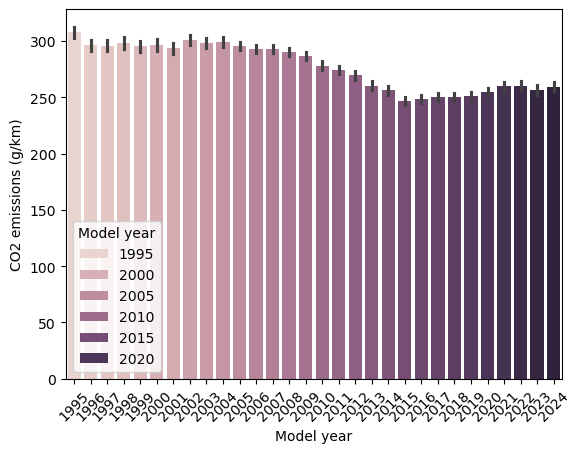

In [13]:
#Gráfico de Barras mostrando la media de CO2 emissions (g/km) para cada año.
sns.barplot(y = df["CO2 emissions (g/km)"], x = df["Model year"], hue = df["Model year"])
plt.xticks(rotation = 45)
plt.show()

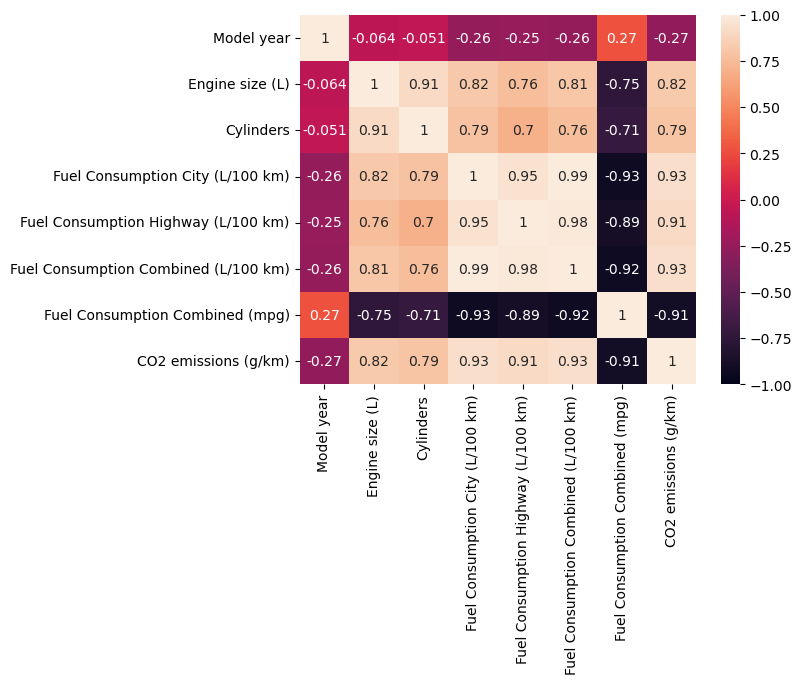

In [14]:
#Gráfico de correlaciones para las columnas numéricas.
sns.heatmap(df._get_numeric_data().corr(), vmin = -1, annot = True)
plt.show()
#df._get_numeric_data()
#Devuelve solo las columnas numéricas de df (descarta las categóricas y de texto).
#Esto es útil porque la correlación (.corr()) solo tiene sentido en variables numéricas.

#.corr()
#Calcula la matriz de correlación de esas columnas.
#El resultado es una tabla donde cada celda indica qué tan relacionadas están dos variables:
#1 → correlación positiva perfecta.
#-1 → correlación negativa perfecta.
#0 → sin relación lineal aparente.

#vmin = -1 fija el valor mínimo de la escala de colores en -1 (correlación más negativa posible).
#annot = True escribe el valor numérico dentro de cada celda.

In [15]:
#02. Procesamiento de Datos
#Codifica las variables categóricas que consideres.
df["Make"] = df["Make"].apply(lambda x : x.lower())
df["Model"] = df["Model"].apply(lambda x : x.lower())
df["Vehicle class"] = df["Vehicle class"].apply(lambda x : x.lower())

#.apply(lambda x : x.lower()) convierte cada valor de la columna a minúsculas.
#Esto es útil porque en variables de texto, "Toyota", "toyota" y "TOYOTA" se tratarían como categorías diferentes si no lo uniformas.
#Así evitas problemas de duplicados falsos cuando más adelante hagas codificación (por ejemplo con pd.get_dummies() o LabelEncoder).

df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),CO2 emissions (g/km)
0,1995,acura,integra,subcompact,1.8,4.0,A4,Reg. Gasoline,11.6,8.3,10.1,28.0,232
1,1995,acura,integra,subcompact,1.8,4.0,M5,Reg. Gasoline,11.0,8.3,9.8,29.0,225
2,1995,acura,integra gs-r,subcompact,1.8,4.0,M5,Prm. Gasoline,10.8,8.3,9.7,29.0,223
3,1995,acura,legend,compact,3.2,6.0,A4,Prm. Gasoline,14.2,10.5,12.5,23.0,288
4,1995,acura,legend coupe,compact,3.2,6.0,A4,Prm. Gasoline,NaN,NaN,NaN,NaN,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27774,2024,volvo,v60 cc b5 awd,station wagon: small,2.0,NaN,AS8,Prm. Gasoline,10.0,7.5,8.9,32.0,207
27775,2024,volvo,v90 cc b6 awd,station wagon: mid-size,2.0,NaN,AS8,Prm. Gasoline,10.7,8.1,9.5,30.0,223
27776,2024,volvo,xc40 b5 awd,sport utility vehicle: small,2.0,NaN,AS8,Prm. Gasoline,9.9,7.8,9.0,31.0,210
27777,2024,volvo,xc60 b5 awd,sport utility vehicle: small,2.0,NaN,AS8,Prm. Gasoline,10.6,8.3,9.6,29.0,226


In [16]:
 df["Transmission"].unique()
#Esto muestra todas las categorías distintas que hay en la columna "Transmission".

def limpiar_transmission(x):
    
    if x[-1] in [f"{i}" for i in range(1, 10)]:
        num = int(x[-1])
        transmission = x[:-1]
    #Comprueba si el último carácter (x[-1]) es un número del 1 al 9.
    #Si sí:
    #Guarda ese número como num (número de marchas).
    #Guarda el resto de la cadena (x[:-1]) como transmission (tipo de transmisión).
    
    else:

        if len(x) > 3:
            num = int(x[-2:])
            transmission = x[:-2]
        #Si el último carácter no es un número:
        #Comprueba si la cadena es más larga que 3 caracteres (len(x) > 3), lo que indica que podría terminar en dos dígitos (por ejemplo "AS10").
        
        #Si sí:
        #Guarda los dos últimos caracteres como número de marchas (int(x[-2:])).
        #El resto es el tipo de transmisión (x[:-2]).

        else:
            transmission = x
            num = np.nan
        #Si no cumple ninguno de los casos anteriores:
        #Guarda toda la cadena como tipo de transmisión.
        #Marca num como NaN porque no hay marchas numéricas (ej. "AV" para CVT).
    
    return transmission, num
#Devuelve una tupla con:
#El tipo de transmisión (string).
#El número de marchas (int o NaN).

In [17]:
#estás aplicando la función que acabas de definir (limpiar_transmission) a toda la columna "Transmission" para crear dos nuevas columnas

df[["letra_transmission", "numero_transmission"]] = [limpiar_transmission(x) for x in df["Transmission"].values]
#[limpiar_transmission(x) for x in df["Transmission"].values]
#Recorre cada valor de la columna "Transmission".
#Para cada valor, llama a limpiar_transmission(x).
#Como esa función devuelve una tupla (tipo, número)

#Pandas ve que la lista contiene tuplas de dos elementos y asigna:
#El primer elemento de cada tupla a la columna "letra_transmission".
#El segundo elemento de cada tupla a "numero_transmission".

df["letra_transmission"].unique()
#Esto te devuelve todas las categorías distintas que han aparecido en la parte de “letra” de la transmisión (ej. "AS", "M", "AV", "A"...).
#Ahora esa columna es una variable categórica limpia, separada del número de marchas.

array(['A', 'M', 'AS', 'AV', 'AM', 'A10'], dtype=object)

In [18]:
 df[["letra_transmission", "numero_transmission"]]

,letra_transmission,numero_transmission
0,A,4.0
1,M,5.0
2,M,5.0
3,A,4.0
4,A,4.0
...,...,...
27774,AS,8.0
27775,AS,8.0
27776,AS,8.0
27777,AS,8.0


In [19]:
#codificar la columna letra_transmission en variables dummy (One-Hot Encoding) para poder usarla en análisis o modelos de machine learning.

ohe_transmission = OneHotEncoder()
#Creas un objeto de OneHotEncoder de sklearn.preprocessing.
#Este codificador transforma categorías en columnas binarias (0 o 1).

ohe_transmission.fit(df[["letra_transmission"]])
#El encoder aprende qué categorías distintas hay en letra_transmission.

df_transmission = pd.DataFrame(data = ohe_transmission.transform(df[["letra_transmission"]]).toarray(),
                               columns = ohe_transmission.get_feature_names_out())
#ohe_transmission.transform(df[["letra_transmission"]]).toarray()
#Convierte cada categoría en un vector de ceros y unos.
#get_feature_names_out() devuelve los nombres de las nuevas columnas
#Así tienes un DataFrame listo con variables binarias.

df_transmission.head(3)

,letra_transmission_A,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
ohe_fuel_type = OneHotEncoder()

ohe_fuel_type.fit(df[["Fuel type"]])

df_fuel_type = pd.DataFrame(data = ohe_fuel_type.transform(df[["Fuel type"]]).toarray(),
                               columns = ohe_fuel_type.get_feature_names_out())

df_fuel_type.head(3)

,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0


In [21]:
df = pd.concat([df, df_transmission, df_fuel_type], axis = 1)
#combinando varias tablas en una sola, agregando las columnas codificadas al DataFrame original.
#axis=1 indica que la concatenación es por columnas (horizontal).
#Cada DataFrame de la lista se añade lado a lado.
df.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),...,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,1995,acura,integra,subcompact,1.8,4.0,A4,Reg. Gasoline,11.6,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1995,acura,integra,subcompact,1.8,4.0,M5,Reg. Gasoline,11.0,8.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1995,acura,integra gs-r,subcompact,1.8,4.0,M5,Prm. Gasoline,10.8,8.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df = df.drop(["Fuel type", "letra_transmission", "Transmission"], axis = 1)
#eliminando las columnas originales que ya codificaste para quedarte solo con las versiones listas para análisis o modelos

df.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),...,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,1995,acura,integra,subcompact,1.8,4.0,11.6,8.3,10.1,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1995,acura,integra,subcompact,1.8,4.0,11.0,8.3,9.8,29.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1995,acura,integra gs-r,subcompact,1.8,4.0,10.8,8.3,9.7,29.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# target_encoding_model = TargetEncoder()
# target_encoding_model.set_output(transform="pandas")
# target_encoding_model.fit(df[["Make", "Model"]], df["CO2 emissions (g/km)"])

# target_encoding_model.transform(df[["Make", "Model"]])

dict_make = df.groupby(by = "Make").agg({"CO2 emissions (g/km)" : "mean"}).to_dict()["CO2 emissions (g/km)"]
#df.groupby("Make") → agrupa por marca.
#.agg({"CO2 emissions (g/km)": "mean"}) → calcula el promedio de CO2 para cada marca.
#.to_dict()["CO2 emissions (g/km)"] → convierte el resultado en un diccionario

df["Make"] = df["Make"].map(dict_make)
#map(dict_make) reemplaza cada valor de "Make" por su promedio de emisiones según el diccionario.
#Ahora "Make" deja de ser categórica y se convierte en numérica, lista para modelos.

In [24]:
dict_model = df.groupby(by = "Model").agg({"CO2 emissions (g/km)" : "mean"}).to_dict()["CO2 emissions (g/km)"]

df["Model"] = df["Model"].map(dict_model)

In [25]:
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),...,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,1995,243.611987,220.8,subcompact,1.8,4.0,11.6,8.3,10.1,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1995,243.611987,220.8,subcompact,1.8,4.0,11.0,8.3,9.8,29.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1995,243.611987,223.0,subcompact,1.8,4.0,10.8,8.3,9.7,29.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1995,243.611987,288.0,compact,3.2,6.0,14.2,10.5,12.5,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1995,243.611987,295.5,compact,3.2,6.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27774,2024,256.631664,209.0,station wagon: small,2.0,NaN,10.0,7.5,8.9,32.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27775,2024,256.631664,224.0,station wagon: mid-size,2.0,NaN,10.7,8.1,9.5,30.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27776,2024,256.631664,212.5,sport utility vehicle: small,2.0,NaN,9.9,7.8,9.0,31.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27777,2024,256.631664,221.0,sport utility vehicle: small,2.0,NaN,10.6,8.3,9.6,29.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
 df["Vehicle class"].value_counts()
#cuántos vehículos hay de cada clase en tu DataFrame.

Vehicle class
compact                            3835
mid-size                           3586
suv                                3043
subcompact                         2658
pickup truck - standard            2278
full-size                          1760
two-seater                         1505
minicompact                        1133
suv: small                         1131
suv - small                         828
station wagon - small               826
suv: standard                       761
pickup truck: standard              691
minivan                             610
suv - standard                      528
pickup truck - small                470
van - cargo                         469
station wagon - mid-size            466
van - passenger                     386
sport utility vehicle: small        184
station wagon: small                165
sport utility vehicle: standard     142
pickup truck: small                 134
special purpose vehicle             119
station wagon: mid-size   

In [27]:
df = df.drop("Vehicle class", axis = 1)
#DataFrame ahora contiene solo columnas numéricas y las columnas que codificaste (One-Hot o target encoding).

df.head(3) 

,Model year,Make,Model,Engine size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),CO2 emissions (g/km),...,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,1995,243.611987,220.8,1.8,4.0,11.6,8.3,10.1,28.0,232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1995,243.611987,220.8,1.8,4.0,11.0,8.3,9.8,29.0,225,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1995,243.611987,223.0,1.8,4.0,10.8,8.3,9.7,29.0,223,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
df["numero_transmission"] = df["numero_transmission"].astype("float64")
#astype("float64") convierte la columna a tipo decimal (float).
#Esto es útil porque antes podía ser object o int, y muchos modelos de machine learning requieren columnas numéricas consistentes.
#Si había valores NaN en la columna, float64 los acepta sin problema.
df.info()
#Muestra un resumen de todas las columnas:
#Nombre de la columna
#Número de valores no nulos
#Tipo de dato (float64, int64, object, etc.)
#Uso de memoria aproximado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27779 entries, 0 to 27778
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Model year                            27779 non-null  int64  
 1   Make                                  27779 non-null  float64
 2   Model                                 27779 non-null  float64
 3   Engine size (L)                       27779 non-null  float64
 4   Cylinders                             27160 non-null  float64
 5   Fuel Consumption City (L/100 km)      26558 non-null  float64
 6   Fuel Consumption Highway (L/100 km)   26558 non-null  float64
 7   Fuel Consumption Combined (L/100 km)  26558 non-null  float64
 8   Fuel Consumption Combined (mpg)       26558 non-null  float64
 9   CO2 emissions (g/km)                  27779 non-null  int64  
 10  numero_transmission                   26606 non-null  float64
 11  letra_transmiss

In [29]:
#Cada columna muestra qué porcentaje de sus filas tienen valores faltantes.

df.isna().sum()/df.shape[0]*100
#df.isna().sum() Cuenta los NaN en cada columna
#df.shape[0] Número total de filas
#df.isna().sum()/df.shape[0]*100 Porcentaje de NaN por columna

#df.isna() → crea un DataFrame de booleanos: True si el valor es NaN, False si no.
#.sum() → suma los True por columna, dando el número de NaN.
#/ df.shape[0] * 100 → divide por el número total de filas y multiplica por 100 para obtener el porcentaje.

Model year                              0.000000
Make                                    0.000000
Model                                   0.000000
Engine size (L)                         0.000000
Cylinders                               2.228302
Fuel Consumption City (L/100 km)        4.395407
Fuel Consumption Highway (L/100 km)     4.395407
Fuel Consumption Combined (L/100 km)    4.395407
Fuel Consumption Combined (mpg)         4.395407
CO2 emissions (g/km)                    0.000000
numero_transmission                     4.222614
letra_transmission_A                    0.000000
letra_transmission_A10                  0.000000
letra_transmission_AM                   0.000000
letra_transmission_AS                   0.000000
letra_transmission_AV                   0.000000
letra_transmission_M                    0.000000
Fuel type_Diesel                        0.000000
Fuel type_Ethanol (E85)                 0.000000
Fuel type_Natural Gas                   0.000000
Fuel type_Prm. Gasol

In [30]:
#Tratamiento de NaN's.

#preprocesamiento completo de tus datos numéricos: escalado, imputación de valores faltantes y luego devolviendo los datos a su escala original.
X = df.copy() #Creas una copia de df para trabajar sin modificar el original directamente.

scaler = StandardScaler()
scaler.set_output(transform="pandas") # Para que devuelva DataFrame
scaler.fit(X) # Aprende media y desviación estándar
X_scaled = scaler.transform(X) # Escala los datos (media=0, std=1)
#Normaliza todas las columnas numéricas.
#Esto es útil para algoritmos como KNN que son sensibles a la escala de los datos.

imputer = KNNImputer()
imputer.set_output(transform="pandas") # Para que devuelva DataFrame
#KNNImputer rellena los NaN basándose en los valores de los vecinos más cercanos en el espacio escalado.
#Como trabajaste sobre X_scaled, la imputación no se ve afectada por diferencias de escala.

imputer.fit(X_scaled)
X_imputed_scaled = imputer.transform(X_scaled)

# Deshacemos el escalado con scaler.inverse_transform
df = pd.DataFrame(data = scaler.inverse_transform(X_imputed_scaled),
                  columns = X_scaled.columns)
#scaler.inverse_transform deshace el escalado para que los valores vuelvan a su magnitud original.
#Ahora df tiene todos los NaN rellenados, pero los datos están en la misma escala que antes del escalado.

df.head(3)

,Model year,Make,Model,Engine size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),CO2 emissions (g/km),...,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,1995.0,243.611987,220.8,1.8,4.0,11.6,8.3,10.1,28.0,232.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1995.0,243.611987,220.8,1.8,4.0,11.0,8.3,9.8,29.0,225.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1995.0,243.611987,223.0,1.8,4.0,10.8,8.3,9.7,29.0,223.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df.isna().sum()

Model year                              0
Make                                    0
Model                                   0
Engine size (L)                         0
Cylinders                               0
Fuel Consumption City (L/100 km)        0
Fuel Consumption Highway (L/100 km)     0
Fuel Consumption Combined (L/100 km)    0
Fuel Consumption Combined (mpg)         0
CO2 emissions (g/km)                    0
numero_transmission                     0
letra_transmission_A                    0
letra_transmission_A10                  0
letra_transmission_AM                   0
letra_transmission_AS                   0
letra_transmission_AV                   0
letra_transmission_M                    0
Fuel type_Diesel                        0
Fuel type_Ethanol (E85)                 0
Fuel type_Natural Gas                   0
Fuel type_Prm. Gasoline                 0
Fuel type_Reg. Gasoline                 0
dtype: int64

In [32]:
#Tratamiento de outliers.

#df → DataFrame donde se encuentra la columna.
#columna → columna numérica que quieres analizar.
#k → factor multiplicativo del IQR (interquartile range). Por defecto 1.5.
#Valores mayores hacen el método más conservador (menos outliers).
#Valores menores lo hacen más estricto (más outliers).
def outliers_tukey(df, columna, k = 1.5):

    q1 = df[columna].quantile(q = 0.25) #primer cuartil (25% de los datos por debajo).
    q3 = df[columna].quantile(q = 0.75) #tercer cuartil (75% de los datos por debajo).
    iqr = q3 - q1 #rango intercuartílico, mide la dispersión central de los datos.

    lim_l = q1 - k*iqr #límites para considerar un valor como outlier.
    lim_r = q3 + k*iqr

    outliers = [x for x in df[columna] if x > lim_r or x < lim_l] #lista con los valores que están fuera de los límites.
    no_outlier = [x for x in df[columna] if x not in outliers] #lista con los valores que no son outliers (opcional, aunque no se usa fuera de la función).

    #Porcentaje de valores fuera de los límites respecto al total de filas.
    porcentaje_outliers = len(outliers)/df.shape[0]*100

    return porcentaje_outliers, lim_l, lim_r

In [33]:
outliers_tukey(df, "Fuel Consumption City (L/100 km)", k = 2)

(0.6443716476475035, 1.7999999999999972, 25.300000000000004)

<Axes: ylabel='Fuel Consumption City (L/100 km)'>

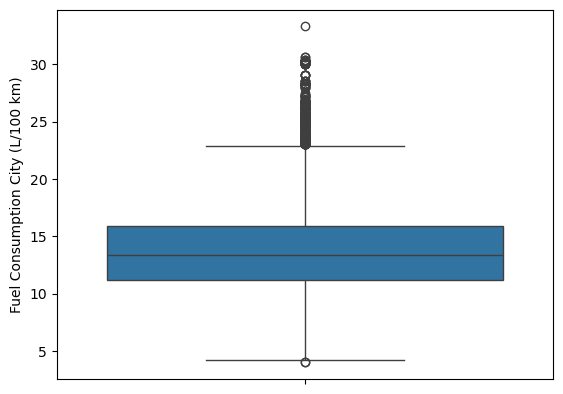

In [34]:
sns.boxplot(df["Fuel Consumption City (L/100 km)"])

In [35]:
#filtrando los outliers de varias columnas numéricas usando el método de Tukey con k = 3 y calculando luego qué porcentaje del DataFrame original queda.

porcentaje, lim_l, lim_r = outliers_tukey(df, "Fuel Consumption City (L/100 km)", k = 3)
df1 = df[df["Fuel Consumption City (L/100 km)"].between(lim_l, lim_r)]
#Calculas los límites para considerar outliers.
#between(lim_l, lim_r) → selecciona filas dentro del rango permitido.
#k=3 → límites más amplios que el estándar (menos sensible), así que solo los outliers muy extremos se eliminan.

porcentaje, lim_l, lim_r = outliers_tukey(df, "Cylinders", k = 3)
df1 = df1[df["Cylinders"].between(lim_l, lim_r)]
#Igual que antes, pero ahora aplicando el filtro sobre la copia df1.
#Esto asegura que se combinen los filtros de todas las columnas de interés.

porcentaje, lim_l, lim_r = outliers_tukey(df, "Engine size (L)", k = 3)
df1 = df1[df["Engine size (L)"].between(lim_l, lim_r)]
#Aplica el mismo proceso a la columna del tamaño del motor.
#Al final, df1 contiene solo las filas que no son outliers en ninguna de estas tres columnas.

df1.shape[0]/df.shape[0]*100
#df1.shape[0] → número de filas después de eliminar outliers.
#df.shape[0] → número de filas original.
#Multiplicando por 100 → porcentaje de datos conservados tras eliminar outliers.

C:\Users\csd\AppData\Local\Temp\ipykernel_18340\1149462814.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df["Cylinders"].between(lim_l, lim_r)]
C:\Users\csd\AppData\Local\Temp\ipykernel_18340\1149462814.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df["Engine size (L)"].between(lim_l, lim_r)]


99.92800316786061

In [36]:
df1

,Model year,Make,Model,Engine size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Highway (L/100 km),Fuel Consumption Combined (L/100 km),Fuel Consumption Combined (mpg),CO2 emissions (g/km),...,letra_transmission_A10,letra_transmission_AM,letra_transmission_AS,letra_transmission_AV,letra_transmission_M,Fuel type_Diesel,Fuel type_Ethanol (E85),Fuel type_Natural Gas,Fuel type_Prm. Gasoline,Fuel type_Reg. Gasoline
0,1995.0,243.611987,220.8,1.8,4.0,11.60,8.3,10.10,28.0,232.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1995.0,243.611987,220.8,1.8,4.0,11.00,8.3,9.80,29.0,225.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1995.0,243.611987,223.0,1.8,4.0,10.80,8.3,9.70,29.0,223.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1995.0,243.611987,288.0,3.2,6.0,14.20,10.5,12.50,23.0,288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1995.0,243.611987,295.5,3.2,6.0,14.72,10.8,12.94,21.8,299.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27774,2024.0,256.631664,209.0,2.0,4.0,10.00,7.5,8.90,32.0,207.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27775,2024.0,256.631664,224.0,2.0,4.0,10.70,8.1,9.50,30.0,223.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27776,2024.0,256.631664,212.5,2.0,4.0,9.90,7.8,9.00,31.0,210.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27777,2024.0,256.631664,221.0,2.0,4.0,10.60,8.3,9.60,29.0,226.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
#03. Modelo de Regresión y Métricas¶
#Con los datos ya preparados, separalos en Train y Test, usa los parámetros test_size = 0.2 y random_state = 42.

X = df1.drop("CO2 emissions (g/km)", axis = 1) #todas las columnas predictoras (variables independientes).
y = df1["CO2 emissions (g/km)"] #columna objetivo (variable dependiente) que quieres predecir.

print(f"X: {X.shape}, y:{y.shape}") #Te muestra las dimensiones de X e y antes de separar en train/test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")
#Muestra las dimensiones de cada conjunto para verificar que la división se hizo correctamente.


X: (27759, 21), y:(27759,)
X_train: (22207, 21), y_train:(22207,)
X_test: (5552, 21), y_test:(5552,)


In [38]:
#Escala los X e y usando MinMaxScaler() para cada uno.


x_scaler = MinMaxScaler() #transforma los datos a un rango entre 0 y 1.
x_scaler.fit(X_train) #calcula el mínimo y máximo de cada columna de entrenamiento.

X_train = x_scaler.transform(X_train) #aplica la transformación.
X_test = x_scaler.transform(X_test) #usa los mismos min/max de entrenamiento para evitar “mirar” los datos de test.


y_scaler = MinMaxScaler()
y_scaler.fit(np.array(y_train).reshape(-1, 1))

y_train = y_scaler.transform(np.array(y_train).reshape(-1, 1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))
#y debe ser reshapeada a 2D (reshape(-1,1)) porque MinMaxScaler espera columnas.
#Esto asegura que los valores de CO2 estén entre 0 y 1.

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")
#Confirma que las matrices tienen la forma correcta después de escalar.


X_train: (22207, 21), y_train:(22207, 1)
X_test: (5552, 21), y_test:(5552, 1)


In [39]:
#Aplica el modelo de LinearRegression() y calcula las métricas para el modelo, guarda estos resultados en forma de DataFrame.

#entrenando un modelo de regresión lineal y evaluando su desempeño sobre los datos de test.
metricas = list()

model = LinearRegression() #modelo lineal de scikit-learn.
model.fit(X_train, y_train) #ajusta los coeficientes del modelo usando los datos escalados de entrenamiento.

yhat = model.predict(X_test)#Predice los valores de CO2 para los datos de test.
                            #yhat todavía está en escala 0-1, igual que y_test.

yhat = y_scaler.inverse_transform(yhat)
y_test = y_scaler.inverse_transform(y_test)
#Convierte los valores predichos y reales a unidades originales (g/km de CO2) para que las métricas sean interpretables.

#calcular metricas
mae = mean_absolute_error(y_test, yhat) #error absoluto promedio.
mse = mean_squared_error(y_test, yhat) #error cuadrático medio.
r2_ = r2_score(y_test, yhat, ) #qué porcentaje de la variabilidad de y explica el modelo.

metricas.append(["model_original", mae, mse, r2_]) #Guarda los resultados en una lista que luego puedes convertir en DataFrame.

In [40]:
metricas

[['model_original',
  2.5646066195500006,
  22.644561769709888,
  0.9946393174650914]]

In [41]:
#entrenar un modelo de regresión lineal usando solo dos features: "Model year" y "Fuel Consumption City (L/100 km)", y luego compararlo con el modelo anterior que usaba todas las variables.

df2 = df1[["Model year", "Fuel Consumption City (L/100 km)"]]

X = df2.copy()
y = df1["CO2 emissions (g/km)"]
#Solo se usan dos columnas como predictores.
#Esto te permite ver si con menos variables se mantiene un buen rendimiento.

print(f"X: {X.shape}, y:{y.shape}")

#Igual que antes, separas los datos en entrenamiento y test (train_test_split) y escalas X e y con MinMaxScaler.
#Esto asegura que los valores estén entre 0 y 1 antes de entrenar el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")

x_scaler = MinMaxScaler()
x_scaler.fit(X_train)

X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_scaler.fit(np.array(y_train).reshape(-1, 1))

y_train = y_scaler.transform(np.array(y_train).reshape(-1, 1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")

#entrenamiento
#Se ajusta un modelo lineal con las dos features seleccionadas.
model = LinearRegression()
model.fit(X_train, y_train)

#prediccion y desescalado
#Las predicciones y los valores reales se llevan de vuelta a las unidades originales (g/km).
yhat = model.predict(X_test)

yhat = y_scaler.inverse_transform(yhat)
y_test = y_scaler.inverse_transform(y_test)

#metricas
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2_ = r2_score(y_test, yhat, )

metricas.append(["modelo_con_menos_columnas", mae, mse, r2_])

X: (27759, 2), y:(27759,)
X_train: (22207, 2), y_train:(22207,)
X_test: (5552, 2), y_test:(5552,)
X_train: (22207, 2), y_train:(22207, 1)
X_test: (5552, 2), y_test:(5552, 1)


In [42]:
#entrenando un modelo de regresión lineal con tres features:
#"Model year"
#"Fuel Consumption City (L/100 km)"
#"Engine size (L)"
#Esto te permite ver si añadiendo "Engine size (L)" al modelo con solo dos variables mejora el desempeño.
df2 = df1[["Model year", "Fuel Consumption City (L/100 km)", "Engine size (L)"]]

X = df2.copy()
y = df1["CO2 emissions (g/km)"]

print(f"X: {X.shape}, y:{y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")

x_scaler = MinMaxScaler()
x_scaler.fit(X_train)

X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_scaler.fit(np.array(y_train).reshape(-1, 1))

y_train = y_scaler.transform(np.array(y_train).reshape(-1, 1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))

print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")


model = LinearRegression()
model.fit(X_train, y_train)

yhat = model.predict(X_test)

yhat = y_scaler.inverse_transform(yhat)
y_test = y_scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2_ = r2_score(y_test, yhat, )

metricas.append(["modelo_con_menos_columnas", mae, mse, r2_])

X: (27759, 3), y:(27759,)
X_train: (22207, 3), y_train:(22207,)
X_test: (5552, 3), y_test:(5552,)
X_train: (22207, 3), y_train:(22207, 1)
X_test: (5552, 3), y_test:(5552, 1)


In [43]:
pd.DataFrame(data = metricas, columns = ["nombre", "mae", "mse", "r2_score"])

,nombre,mae,mse,r2_score
0,model_original,2.564607,22.644562,0.994639
1,modelo_con_menos_columnas,13.508765,526.460667,0.875370
2,modelo_con_menos_columnas,13.710625,469.375128,0.888884


In [44]:
# Modelo para cada nube

#entrenar un modelo de regresión lineal por cada tipo de combustible, en lugar de un modelo global para todos los vehículos. Esto te permite evaluar si las relaciones entre las variables (Model year, Fuel Consumption City (L/100 km)) y las emisiones de CO₂ cambian según el tipo de combustible.

#Seleccionas las columnas relevantes:
#Incluyes las variables predictoras, el target y las columnas de codificación one-hot de combustible.
df2 = df1[["Model year", "Fuel Consumption City (L/100 km)", "CO2 emissions (g/km)",
           "Fuel type_Diesel", "Fuel type_Ethanol (E85)", "Fuel type_Natural Gas", "Fuel type_Prm. Gasoline", "Fuel type_Reg. Gasoline"]]

columnas_combustible = ["Fuel type_Diesel", "Fuel type_Ethanol (E85)", "Fuel type_Natural Gas", "Fuel type_Prm. Gasoline", "Fuel type_Reg. Gasoline"]

#Iteras por cada tipo de combustible:
#Filtras solo los vehículos de ese tipo de combustible.
#df_filtrado.drop(columnas_combustible, axis = 1) elimina las columnas de combustible para que no se incluyan como predictores (aunque en tu código actual falta reasignar df_filtrado = df_filtrado.drop(...)).
for fuel in columnas_combustible:

    df_filtrado = df2[df2[fuel] == 1]
    df_filtrado.drop(columnas_combustible, axis = 1)
    
    X = df_filtrado.drop("CO2 emissions (g/km)", axis = 1)
    y = df_filtrado["CO2 emissions (g/km)"]
    
    print(f"X: {X.shape}, y:{y.shape}")
    
    #Separación Train/Test y escalado:
    #Igual que antes, escalas los X con MinMaxScaler() y escalas el target y.
    #Esto asegura que cada modelo por combustible tenga sus variables en el mismo rango.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
    print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")
    
    x_scaler = MinMaxScaler()
    x_scaler.fit(X_train)
    
    X_train = x_scaler.transform(X_train)
    X_test = x_scaler.transform(X_test)
    
    y_scaler = MinMaxScaler()
    y_scaler.fit(np.array(y_train).reshape(-1, 1))
    
    y_train = y_scaler.transform(np.array(y_train).reshape(-1, 1))
    y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))
    
    print(f"X_train: {X_train.shape}, y_train:{y_train.shape}")
    print(f"X_test: {X_test.shape}, y_test:{y_test.shape}")
    
    #Entrenamiento y predicción:
    #Entrenas un modelo para ese tipo de combustible y haces predicciones.
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    yhat = model.predict(X_test)
    
    yhat = y_scaler.inverse_transform(yhat)
    y_test = y_scaler.inverse_transform(y_test)
    
    #Cálculo de métricas y almacenamiento:
    mae = mean_absolute_error(y_test, yhat)
    mse = mean_squared_error(y_test, yhat)
    r2_ = r2_score(y_test, yhat)
    
    metricas.append([fuel, mae, mse, r2_])

X: (506, 7), y:(506,)
X_train: (404, 7), y_train:(404,)
X_test: (102, 7), y_test:(102,)
X_train: (404, 7), y_train:(404, 1)
X_test: (102, 7), y_test:(102, 1)
X: (1085, 7), y:(1085,)
X_train: (868, 7), y_train:(868,)
X_test: (217, 7), y_test:(217,)
X_train: (868, 7), y_train:(868, 1)
X_test: (217, 7), y_test:(217, 1)
X: (39, 7), y:(39,)
X_train: (31, 7), y_train:(31,)
X_test: (8, 7), y_test:(8,)
X_train: (31, 7), y_train:(31, 1)
X_test: (8, 7), y_test:(8, 1)
X: (10949, 7), y:(10949,)
X_train: (8759, 7), y_train:(8759,)
X_test: (2190, 7), y_test:(2190,)
X_train: (8759, 7), y_train:(8759, 1)
X_test: (2190, 7), y_test:(2190, 1)
X: (15180, 7), y:(15180,)
X_train: (12144, 7), y_train:(12144,)
X_test: (3036, 7), y_test:(3036,)
X_train: (12144, 7), y_train:(12144, 1)
X_test: (3036, 7), y_test:(3036, 1)


In [45]:
pd.DataFrame(data = metricas, columns = ["nombre", "mae", "mse", "r2_score"])

,nombre,mae,mse,r2_score
0,model_original,2.564607,22.644562,0.994639
1,modelo_con_menos_columnas,13.508765,526.460667,0.875370
2,modelo_con_menos_columnas,13.710625,469.375128,0.888884
3,Fuel type_Diesel,6.319670,87.430895,0.981580
4,Fuel type_Ethanol (E85),6.395119,74.724026,0.974131
5,Fuel type_Natural Gas,10.536064,173.554249,0.968351
6,Fuel type_Prm. Gasoline,5.716020,60.660187,0.984073
7,Fuel type_Reg. Gasoline,6.420103,70.080077,0.984688


In [ ]:
##############################################################################################################################